In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score,train_test_split, KFold, GroupKFold

In [4]:
path = '../../dados/procucao_gado_MS.csv'
df = pd.read_csv(path, sep=';')

In [5]:
df.sample(3)

,tipificacao_1,tipificacao_2,tipificacao_3,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,...,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
887253,1,0,0,1,3,312.0,30.0,0,1,0,...,0.4194,0.5376,0.6940,0.6721,2018,1,1,-54.363190,-19.920920,11
275039,1,0,0,2,3,288.0,26.0,0,1,0,...,0.7419,0.7419,0.7923,0.7328,2017,2,1,-54.188198,-23.490663,12
271928,0,0,1,1,4,250.4,21.0,0,1,0,...,0.5357,0.4808,0.6048,0.5535,2017,1,1,-53.826970,-22.301604,12


In [6]:
print('A base de dados apresenta {} registros e {} características.'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 960939 registros e 53 características.


In [7]:
y = df['categoria']
# Retirar a variável alvo e as variáveis obtidas após o abate 
X = df.drop(['peso','acabamento', 'maturidade', 'classificacao','categoria', 'ano'],axis=1)

In [8]:
SEED = 42

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=SEED)

In [10]:
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

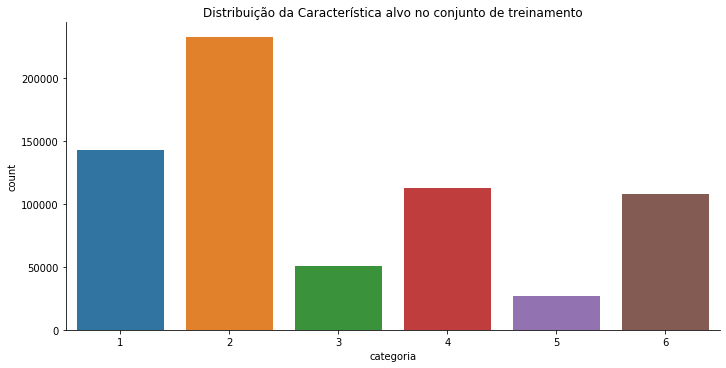

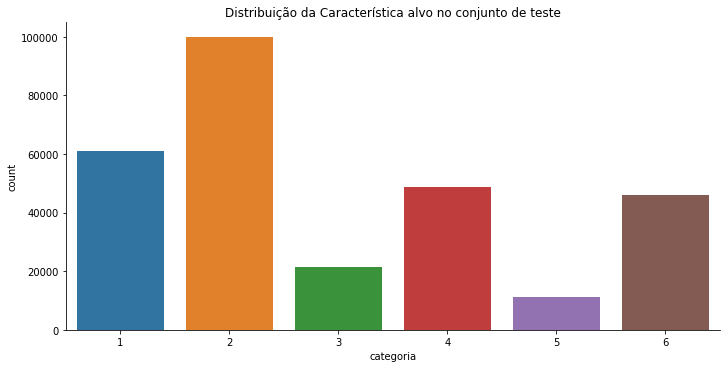

In [11]:
sns.catplot(x = "categoria", data = df_y_train, 
            kind="count", 
            aspect=2).set(title='Distribuição da Característica alvo no conjunto de treinamento')
sns.catplot(x = "categoria", data = df_y_test, 
            kind="count", 
            aspect=2).set(title='Distribuição da Característica alvo no conjunto de teste')

## Esportando a amostra de treino

In [12]:
df_train = X_train.join(df_y_train)

In [13]:
df_train.to_csv("df_train_class.csv", sep=';', index=False)

## Exportando a amostra de teste

In [14]:
df_test = X_test.join(df_y_test)

In [16]:
df_test.to_csv("df_test_class.csv", sep=';', index=False)